# Домашняя работа 2.

### Машинные методы в помощь обработке данным

In [1]:
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [3]:
import matplotlib.pyplot as plt

https://www.kaggle.com/c/boston-housing/overview

Таблица цен на дома в Бостоне

- CRIM: Это уровень преступности на душу населения по городам
- ZN: Это доля жилой земли, зонированной для участков более 25 000 кв. футов.
- INDUS: Это доля не торговых площадей в каждом городе.
- CHAS: Это фиктивная переменная реки Charles River (она равна 1, если тракт ограничивает реку; в противном случае 0)
- NOX: это концентрация оксидов азота (частей на 10 миллионов)
- RM: это среднее количество комнат на одно жилище
- AGE: Это доля занятых владельцем единиц, построенных до 1940 года
- DIS: Это взвешенные расстояния до пяти бостонских центров занятости
- RAD: Это показатель доступности радиальных магистралей
- TAX: это полная стоимость налога на имущество на 10 000 долларов
- PTRATIO: Это соотношение учеников и учителей по городам
- B: Это рассчитывается как 1000 (Bk - 0,63) ², где Bk - это доля людей афроамериканского происхождения по городам.
- LSTAT: это процент низкого статуса населения
- MEDV: это средняя стоимость домов, занимаемых владельцами, в 1000 долларов.

In [4]:
data_house = pd.read_csv('homework.csv')
data_house.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [5]:
data_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


333 строк, пропущенных данных нет

In [6]:
data_house.columns

Index(['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

### 1. Решить задачу регрессии:

#### 1 - Выделяем признаки и метки

In [7]:
#признаки и метки
# Формируем признаки и целевую переменную
X = data_house[['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 
                   'tax', 'ptratio', 'black', 'lstat']]
y = data_house['medv']

#### 2 - Разделяем данные на данные для обучения и проверки

Выделим из датасета тренировочные и тестовые данные. 
- **train** Тренировочные данные будем использовать для обучения модели. 
- **test** Тестовые данные будем использовать для подсчета качества модели (20%).

In [8]:
# Разделяем данные на данные для обучения и проверки  train_test_split 20 процентов
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
#признаки тренировочных
X_train.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
229,345,0.03049,55.0,3.78,0,0.484,6.874,28.1,6.4654,5,370,17.6,387.97,4.61
306,468,4.42228,0.0,18.10,0,0.584,6.003,94.5,2.5403,24,666,20.2,331.29,21.32
80,120,0.14476,0.0,10.01,0,0.547,5.731,65.2,2.7592,6,432,17.8,391.50,13.61
278,432,10.06230,0.0,18.10,0,0.584,6.833,94.3,2.0882,24,666,20.2,81.33,19.69
273,425,8.79212,0.0,18.10,0,0.584,5.565,70.6,2.0635,24,666,20.2,3.65,17.16


In [10]:
#метка тренировочных
y_train.head()

229    31.2
306    19.1
80     19.3
278    14.1
273    11.7
Name: medv, dtype: float64

In [11]:
#признаки тестовых
X_test.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,1,0.00632,18.0,2.31,0,0.5380,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
188,283,0.06129,20.0,3.33,1,0.4429,7.645,49.7,5.2119,5,216,14.9,377.07,3.01
272,420,11.81230,0.0,18.10,0,0.7180,6.824,76.5,1.7940,24,666,20.2,48.45,22.74
152,224,0.61470,0.0,6.20,0,0.5070,6.618,80.8,3.2721,8,307,17.4,396.90,7.60
153,225,0.31533,0.0,6.20,0,0.5040,8.266,78.3,2.8944,8,307,17.4,385.05,4.14


In [12]:
#метка тестовых
y_test.head()

0      24.0
188    46.0
272     8.4
152    30.1
153    44.8
Name: medv, dtype: float64

#### 3 - Приводим данные к одному масштабу

In [13]:
#копия тестовых данных
result = X_test.copy()
#сохрянем таргет-значение
result['TARGET'] = y_test
result.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,TARGET
0,1,0.00632,18.0,2.31,0,0.5380,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
188,283,0.06129,20.0,3.33,1,0.4429,7.645,49.7,5.2119,5,216,14.9,377.07,3.01,46.0
272,420,11.81230,0.0,18.10,0,0.7180,6.824,76.5,1.7940,24,666,20.2,48.45,22.74,8.4
152,224,0.61470,0.0,6.20,0,0.5070,6.618,80.8,3.2721,8,307,17.4,396.90,7.60,30.1
153,225,0.31533,0.0,6.20,0,0.5040,8.266,78.3,2.8944,8,307,17.4,385.05,4.14,44.8


In [14]:
# Приводим данные к одному масштабу
#обучение на трейне и проверка на тесте
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
X_train

array([[ 0.62955654, -0.48767387,  1.85277445, ..., -0.44375001,
         0.32157969, -1.15224887],
       [ 1.47196915,  0.24359165, -0.46994108, ...,  0.79473871,
        -0.37822147,  1.28707733],
       [-0.91144215, -0.46864707, -0.46994108, ..., -0.34848164,
         0.36516293,  0.16157135],
       ...,
       [ 0.51997441, -0.48173289, -0.46994108, ..., -0.77718928,
         0.25330339, -0.36979594],
       [-0.01423847, -0.46938969,  0.45914513, ...,  0.27076272,
         0.42417933, -0.96393464],
       [ 0.62270766, -0.4885164 ,  1.85277445, ..., -0.44375001,
         0.43183418, -0.7770802 ]])

In [16]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [17]:
#один масштаб
X_train.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.629557,-0.487674,1.852774,-1.077973,-0.252982,-0.635584,0.899313,-1.422922,1.330093,-0.510346,-0.210849,-0.443750,0.321580,-1.152249
1,1.471969,0.243592,-0.469941,0.930985,-0.252982,0.227778,-0.371962,0.935051,-0.596778,1.697948,1.534097,0.794739,-0.378221,1.287077
2,-0.911442,-0.468647,-0.469941,-0.203964,-0.252982,-0.091666,-0.768962,-0.105440,-0.489318,-0.394120,0.154646,-0.348482,0.365163,0.161571
3,1.225409,1.182697,-0.469941,0.930985,-0.252982,0.227778,0.839471,0.927949,-0.818718,1.697948,1.534097,0.794739,-3.464359,1.049130
4,1.177467,0.971202,-0.469941,0.930985,-0.252982,0.227778,-1.011249,0.086323,-0.830844,1.697948,1.534097,0.794739,-4.423438,0.679800


In [18]:
X_test.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,-1.726459,-0.491698,0.290220,-1.284200,-0.252982,-0.169368,0.462905,-0.105440,0.163985,-0.975250,-0.647085,-1.539336,0.431834,-1.098236
1,0.204926,-0.482545,0.374683,-1.141104,3.952847,-0.990426,2.024633,-0.655871,0.714737,-0.510346,-1.118692,-1.729873,0.187003,-1.385817
2,1.143223,1.474085,-0.469941,0.930985,-0.252982,1.384683,0.826335,0.295841,-0.963144,1.697948,1.534097,0.794739,-3.870313,1.494369
3,-0.199158,-0.390399,-0.469941,-0.738470,-0.252982,-0.437010,0.525666,0.448541,-0.237530,-0.161668,-0.582240,-0.539018,0.431834,-0.715769
4,-0.192309,-0.440246,-0.469941,-0.738470,-0.252982,-0.462911,2.931019,0.359762,-0.422947,-0.161668,-0.582240,-0.539018,0.285528,-1.220859


#### 4 - Обучение и оценка качества

In [19]:
#создаем временные структуры
TestModels_ms = pd.DataFrame(columns = ['Model', 'train', 'test'])
TestModels_ma = pd.DataFrame(columns = ['Model', 'train', 'test'])
TestModels_r2 = pd.DataFrame(columns = ['Model', 'train', 'test'])

##### LinearRegression (метод наименьших квадратов, линейная регрессия)

In [20]:
#LinearRegression (метод наименьших квадратов, линейная регрессия)
reg = LinearRegression()

In [21]:
#обучаем на данных
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##### оценка качества LinearRegression (метод наименьших квадратов)

In [22]:
#Среднеквадратическая ошибка регрессии потери
mean_squared_error(y_train, reg.predict(X_train))

22.031030488900406

In [23]:
#Среднеквадратическая ошибка регрессии потери
mean_squared_error(y_test, reg.predict(X_test))

27.225681641447824

In [24]:
#Средняя абсолютная погрешность регрессии потерь
mean_absolute_error(y_train, reg.predict(X_train))

3.290606399825847

In [25]:
#Средняя абсолютная погрешность регрессии потерь
mean_absolute_error(y_test, reg.predict(X_test))

3.9112423035758126

In [26]:
#(коэффициент детерминации) функция оценки регрессии
r2_score(y_train, reg.predict(X_train))

0.7411884627151992

In [27]:
#(коэффициент детерминации) функция оценки регрессии
r2_score(y_test, reg.predict(X_test))

0.6551393643670652

In [28]:
#сохраняем результаты
TestModels_ms.loc[0] = ['LinearRegression',
                     mean_squared_error(y_train, reg.predict(X_train)),
                     mean_squared_error(y_test, reg.predict(X_test))          
]


TestModels_ma.loc[0] = ['LinearRegression',
                     mean_absolute_error(y_train, reg.predict(X_train)),
                     mean_absolute_error(y_test, reg.predict(X_test))
                     
]

TestModels_r2.loc[0] = ['LinearRegression',
                     r2_score(y_train, reg.predict(X_train)),
                     r2_score(y_test, reg.predict(X_test))                     
]

In [29]:
#сохраняем предсказания
result['PREDICTION_LinearRegression'] = reg.predict(X_test)

##### Epsilon-Support Vector Regression (метод опорных векторов с линейным ядром)

In [30]:
#Epsilon-Support Vector Regression
clf = SVR(C=1.0, epsilon=0.2)

In [31]:
##обучаем на данных
clf.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

##### оценка качества Epsilon-Support Vector Regression

In [32]:
#Среднеквадратическая ошибка регрессии потери
mean_squared_error(y_train, clf.predict(X_train))

37.16816176926527

In [33]:
#Среднеквадратическая ошибка регрессии потери
mean_squared_error(y_test, clf.predict(X_test))

25.096335624906754

In [34]:
#Средняя абсолютная погрешность регрессии потерь
mean_absolute_error(y_train, clf.predict(X_train))

3.3164987137561313

In [35]:
#Средняя абсолютная погрешность регрессии потерь
mean_absolute_error(y_test, clf.predict(X_test))

3.5499922635088446

In [36]:
#(коэффициент детерминации) функция оценки регрессии
r2_score(y_train, clf.predict(X_train))

0.5633636342884554

In [37]:
#(коэффициент детерминации) функция оценки регрессии
r2_score(y_test, clf.predict(X_test))

0.682111237116392

In [38]:
#сохраняем результаты
TestModels_ms.loc[1] = ['SupportVectorRegression',
                     mean_squared_error(y_train, clf.predict(X_train)),
                     mean_squared_error(y_test, clf.predict(X_test))                     
]

TestModels_ma.loc[1] = ['SupportVectorRegression',
                     mean_absolute_error(y_train, clf.predict(X_train)),
                     mean_absolute_error(y_test, clf.predict(X_test))                     
]

TestModels_r2.loc[1] = ['SupportVectorRegression',
                     r2_score(y_train, clf.predict(X_train)),
                     r2_score(y_test, clf.predict(X_test))                     
]

In [39]:
#сохраняем предсказания
result['PREDICTION_SupportVectorRegression'] = clf.predict(X_test)

##### DecisionTreeRegressor (метод дерева решений)

In [40]:
# DecisionTreeRegressor (метод дерева решений)
regressor = DecisionTreeRegressor()

In [41]:
#обучаем на данных
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

##### оценка качества DecisionTreeRegressor (метод дерева решений)

In [42]:
#Среднеквадратическая ошибка регрессии потери
mean_squared_error(y_train, regressor.predict(X_train))

0.0

In [43]:
#Среднеквадратическая ошибка регрессии потери
mean_squared_error(y_test, regressor.predict(X_test))

13.86044776119403

In [44]:
#Средняя абсолютная погрешность регрессии потерь
mean_absolute_error(y_train, regressor.predict(X_train))

0.0

In [45]:
#Средняя абсолютная погрешность регрессии потерь
mean_absolute_error(y_test, regressor.predict(X_test))

2.9208955223880597

In [46]:
#(коэффициент детерминации) функция оценки регрессии
r2_score(y_train, regressor.predict(X_train))

1.0

In [47]:
#(коэффициент детерминации) функция оценки регрессии
r2_score(y_test, regressor.predict(X_test))

0.8244333094013115

In [48]:
#сохраняем результаты
TestModels_ms.loc[2] = ['DecisionTreeRegressor',
                     mean_squared_error(y_train, regressor.predict(X_train)),
                     mean_squared_error(y_test, regressor.predict(X_test))                     
]

TestModels_ma.loc[2] = ['DecisionTreeRegressor',
                     mean_absolute_error(y_train, regressor.predict(X_train)),
                     mean_absolute_error(y_test, regressor.predict(X_test))                     
]

TestModels_r2.loc[2] = ['DecisionTreeRegressor',
                     r2_score(y_train, regressor.predict(X_train)),
                     r2_score(y_test, regressor.predict(X_test))                     
]

In [49]:
#сохраняем предсказания
result['PREDICTION_DecisionTreeRegressor'] = regressor.predict(X_test)

#### 5 - визуализация оценки качества

In [50]:
#оценка Среднеквадратическая ошибка регрессии потери
TestModels_ms

,Model,train,test
0,LinearRegression,22.031030,27.225682
1,SupportVectorRegression,37.168162,25.096336
2,DecisionTreeRegressor,0.000000,13.860448


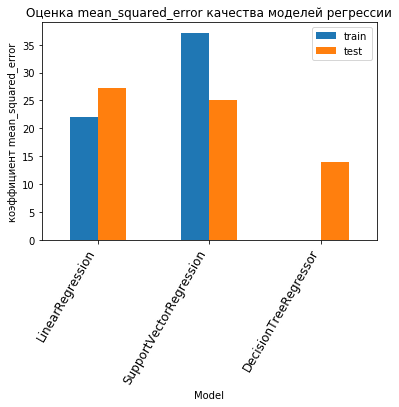

In [51]:
#визуализация оценок
TestModels_ms.plot(kind='bar')
plt.xticks( TestModels_ms.index, TestModels_ms.Model, rotation=60, horizontalalignment='right', fontsize=12)
plt.xlabel('Model')
plt.ylabel('коэффициент mean_squared_error')
plt.title('Оценка mean_squared_error качества моделей регрессии')
plt.show()

Метрика измеряет среднюю сумму квадратной разности между фактическим значением и прогнозируемым значением для всех точек данных.

Для среднеквадратической ошибки наименьшее значение коэффициента - лучшее. 
Поэтому можно сделать вывод, что лучше других с задачей справился метод DecisionTreeRegressor (метод дерева решений).

Его коэффициенты ниже остальных как на тренировочных, так и тестовых данных:
- train=0
- test=14.048060

In [52]:
#Средняя абсолютная погрешность регрессии потерь
TestModels_ma

,Model,train,test
0,LinearRegression,3.290606,3.911242
1,SupportVectorRegression,3.316499,3.549992
2,DecisionTreeRegressor,0.000000,2.920896


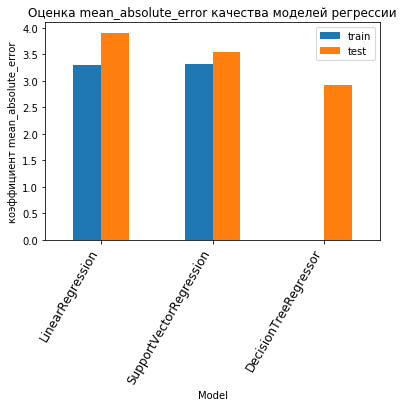

In [53]:
#визуализация оценок
TestModels_ma.plot(kind='bar')
plt.xticks( TestModels_ma.index, TestModels_ma.Model, rotation=60, horizontalalignment='right', fontsize=12)
plt.xlabel('Model')
plt.ylabel('коэффициент mean_absolute_error')
plt.title('Оценка mean_absolute_error качества моделей регрессии')
plt.show()

Метрика измеряет среднюю сумму абсолютной разницы между фактическим значением и прогнозируемым значением.

Значение 0 указывает на отсутствие ошибок или точных прогнозов. Поэтому можно сделать вывод, что лучше других с задачей справился метод DecisionTreeRegressor (метод дерева решений).

Его коэффициенты ниже остальных как на тренировочных, так и тестовых данных:

- train=0
- test=2.991045

In [54]:
#(коэффициент детерминации) функция оценки регрессии
TestModels_r2

,Model,train,test
0,LinearRegression,0.741188,0.655139
1,SupportVectorRegression,0.563364,0.682111
2,DecisionTreeRegressor,1.000000,0.824433


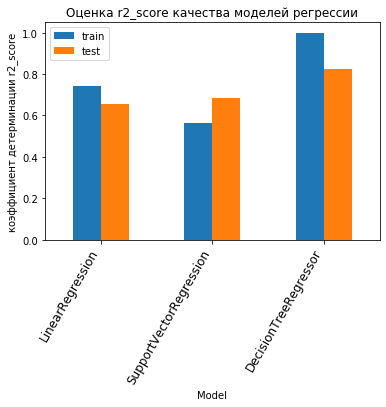

In [55]:
#визуализация оценок
TestModels_r2.plot(kind='bar')
plt.xticks( TestModels_r2.index, TestModels_r2.Model, rotation=60, horizontalalignment='right', fontsize=12)
plt.xlabel('Model')
plt.ylabel('коэффициент детерминации r2_score')
plt.title('Оценка r2_score качества моделей регрессии')
plt.show()

Из графика выше, можно сделать вывод, что лучше других с задачей справился метод DecisionTreeRegressor (метод дерева решений).

Его коэффициенты детерминации (r2_score) выше остальных как на тренировочных, так и тестовых данных:
- train=1.000000
- test=0.830167

(Если же коэффициент детерминации алгоритма близок к 1, скорей всего, это хороший алгоритм, который близок к оптимальному.)

#### 6 - визуализация предсказанных значений

In [56]:
#тестовые данные, таргет-значение и предсказанное значение всеми алгоритмами
result

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,TARGET,PREDICTION_LinearRegression,PREDICTION_SupportVectorRegression,PREDICTION_DecisionTreeRegressor
0,1,0.00632,18.0,2.31,0,0.5380,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,31.470551,27.986421,28.0
188,283,0.06129,20.0,3.33,1,0.4429,7.645,49.7,5.2119,5,216,14.9,377.07,3.01,46.0,41.441160,26.826726,37.6
272,420,11.81230,0.0,18.10,0,0.7180,6.824,76.5,1.7940,24,666,20.2,48.45,22.74,8.4,14.824360,13.865360,9.7
152,224,0.61470,0.0,6.20,0,0.5070,6.618,80.8,3.2721,8,307,17.4,396.90,7.60,30.1,30.101106,26.633950,27.1
153,225,0.31533,0.0,6.20,0,0.5040,8.266,78.3,2.8944,8,307,17.4,385.05,4.14,44.8,39.850877,33.050543,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,17,1.05393,0.0,8.14,0,0.5380,5.935,29.3,4.4986,4,307,21.0,386.85,6.58,23.1,22.394651,21.882745,19.9
61,89,0.05660,0.0,3.41,0,0.4890,7.007,86.3,3.4217,2,270,17.8,396.90,5.50,23.6,32.224640,28.272025,28.7
282,438,15.17720,0.0,18.10,0,0.7400,6.152,100.0,1.9142,24,666,20.2,9.32,26.45,8.7,8.831105,13.819347,10.8
240,366,4.55587,0.0,18.10,0,0.7180,3.561,87.9,1.6132,24,666,20.2,354.70,7.12,27.5,16.360355,20.829346,18.7


In [57]:
rez = result[['ID','TARGET', 'PREDICTION_LinearRegression', 'PREDICTION_SupportVectorRegression', 'PREDICTION_DecisionTreeRegressor']].sort_values(by='ID', ascending=True)
rez

,ID,TARGET,PREDICTION_LinearRegression,PREDICTION_SupportVectorRegression,PREDICTION_DecisionTreeRegressor
0,1,24.0,31.470551,27.986421,28.0
1,2,21.6,26.219195,23.404305,23.9
6,12,18.9,21.699166,21.226658,23.1
7,13,21.7,19.737187,21.796153,22.9
11,17,23.1,22.394651,21.882745,19.9
...,...,...,...,...,...
312,477,16.7,20.105602,17.341056,16.1
315,480,21.4,23.982680,17.617110,17.7
316,481,23.0,24.402271,21.204952,21.4
320,487,19.1,19.835755,18.785272,19.5


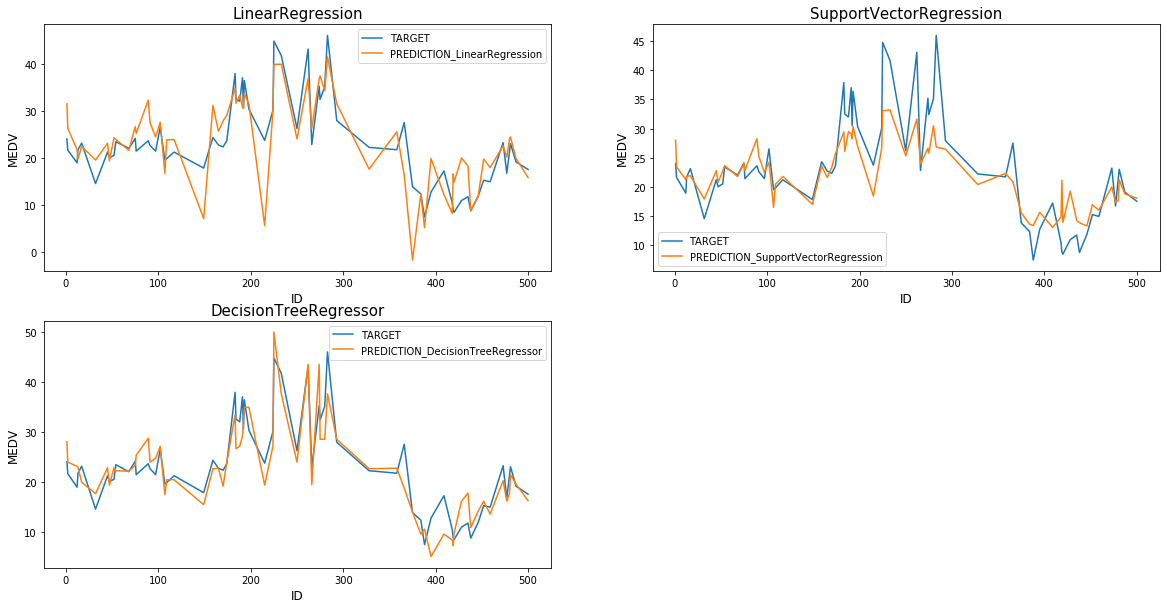

In [58]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
plt.plot(list(rez['ID']), list(rez['TARGET']), label='TARGET')
plt.plot(list(rez['ID']), list(rez['PREDICTION_LinearRegression']), label='PREDICTION_LinearRegression')
plt.title('LinearRegression', fontsize=15)
plt.xlabel('ID', fontsize=12)
plt.ylabel('MEDV', fontsize=12)
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(list(rez['ID']), list(rez['TARGET']), label='TARGET')
plt.plot(list(rez['ID']), list(rez['PREDICTION_SupportVectorRegression']), label='PREDICTION_SupportVectorRegression')
plt.title('SupportVectorRegression', fontsize=15)
plt.xlabel('ID', fontsize=12)
plt.ylabel('MEDV', fontsize=12)
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(list(rez['ID']), list(rez['TARGET']), label='TARGET')
plt.plot(list(rez['ID']), list(rez['PREDICTION_DecisionTreeRegressor']), label='PREDICTION_DecisionTreeRegressor')
plt.title('DecisionTreeRegressor', fontsize=15)
plt.xlabel('ID', fontsize=12)
plt.ylabel('MEDV', fontsize=12)
plt.legend()

plt.show()

Также визуально линия с предсказанными значениями наимболее близка к линии с таргет-значениями у модели DecisionTreeRegressor (метод дерева решений).

##### 7 - применение модели

In [59]:
#новые данные
data_house_new = pd.read_csv('homework_new.csv')
data_house_new.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [60]:
#данные для прогнезирования
X_new = data_house_new[['ID', 'crim', 'zn', 'indus', 'chas',
                        'nox', 'rm', 'age', 'dis', 'rad',
                        'tax', 'ptratio', 'black', 'lstat']]
X_new

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43
5,11,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45
6,12,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311,15.2,396.90,13.27
7,13,0.09378,12.5,7.87,0,0.524,5.889,39.0,5.4509,5,311,15.2,390.50,15.71
8,14,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26
9,15,0.63796,0.0,8.14,0,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26


In [61]:
y_target = data_house_new[['medv']]
y_target

,medv
0,24.0
1,21.6
2,33.4
3,36.2
4,22.9
5,15.0
6,18.9
7,21.7
8,20.4
9,18.2


In [62]:
#данные для обучения
X = data_house[['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 
                   'tax', 'ptratio', 'black', 'lstat']]
y = data_house['medv']

#DecisionTreeRegressor (метод дерева решений)
regressor = DecisionTreeRegressor()

#обучаем на данных
regressor.fit(X, y)

#применяем модель и получаем спрогнозированную величину для анализа.
data_house_new['medv_prediction'] = regressor.predict(X_new)

In [63]:
rez_prediction = data_house_new[['ID', 'medv', 'medv_prediction']].sort_values(by='ID', ascending=True)
rez_prediction

,ID,medv,medv_prediction
0,1,24.0,24.0
1,2,21.6,21.6
2,4,33.4,33.4
3,5,36.2,36.2
4,7,22.9,22.9
5,11,15.0,15.0
6,12,18.9,18.9
7,13,21.7,21.7
8,14,20.4,20.4
9,15,18.2,18.2


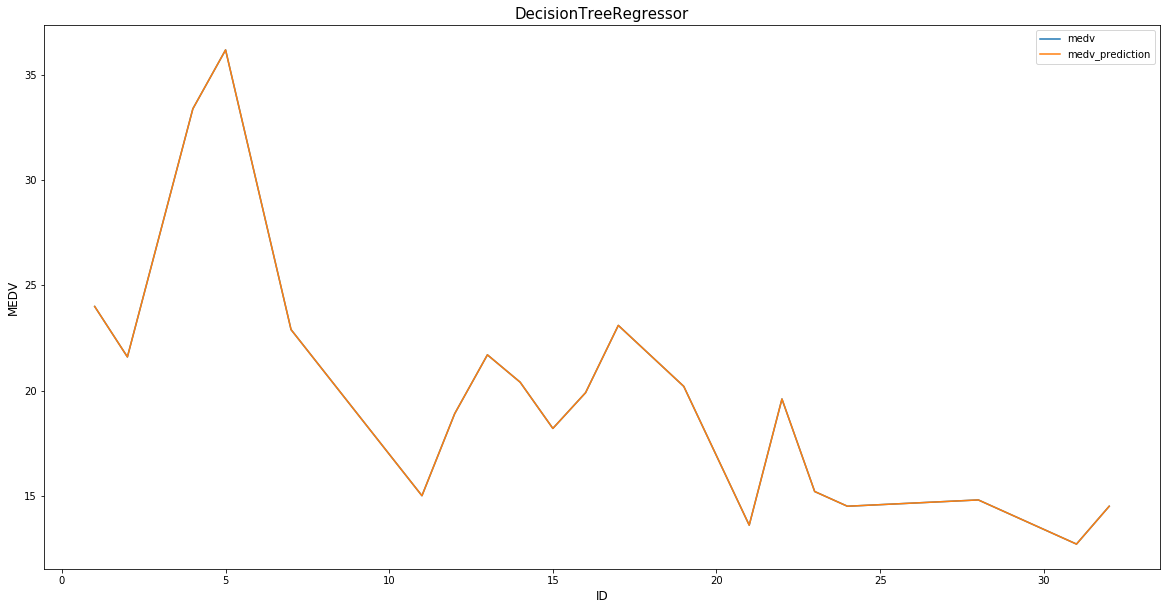

In [64]:
plt.figure(figsize=(20, 10))

#plt.subplot(2, 2, 1)
plt.plot(list(rez_prediction['ID']), list(rez_prediction['medv']), label='medv')
plt.plot(list(rez_prediction['ID']), list(rez_prediction['medv_prediction']), label='medv_prediction')
plt.title('DecisionTreeRegressor', fontsize=15)
plt.xlabel('ID', fontsize=12)
plt.ylabel('MEDV', fontsize=12)
plt.legend()

plt.show()

линии совпадаю, значит модель предсказала верно